In [5]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, regularizers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
def vectorize_sequences(sequences, ndim=10000):
  vec_seq = np.zeros((len(sequences), ndim))
  for i, seq in enumerate(sequences):
    vec_seq[i,seq] = 1.
  return vec_seq

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [9]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [10]:
original_model_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test),
                                   verbose=2)
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test),
                                   verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4522 - acc: 0.8220 - val_loss: 0.3375 - val_acc: 0.8789
Epoch 2/20
49/49 - 2s - loss: 0.2599 - acc: 0.9096 - val_loss: 0.2870 - val_acc: 0.8870
Epoch 3/20
49/49 - 2s - loss: 0.2005 - acc: 0.9286 - val_loss: 0.2889 - val_acc: 0.8836
Epoch 4/20
49/49 - 2s - loss: 0.1688 - acc: 0.9408 - val_loss: 0.3050 - val_acc: 0.8782
Epoch 5/20
49/49 - 2s - loss: 0.1423 - acc: 0.9516 - val_loss: 0.3083 - val_acc: 0.8802
Epoch 6/20
49/49 - 2s - loss: 0.1251 - acc: 0.9569 - val_loss: 0.3282 - val_acc: 0.8770
Epoch 7/20
49/49 - 2s - loss: 0.1070 - acc: 0.9642 - val_loss: 0.3609 - val_acc: 0.8708
Epoch 8/20
49/49 - 2s - loss: 0.0938 - acc: 0.9705 - val_loss: 0.3930 - val_acc: 0.8658
Epoch 9/20
49/49 - 2s - loss: 0.0815 - acc: 0.9743 - val_loss: 0.4032 - val_acc: 0.8682
Epoch 10/20
49/49 - 2s - loss: 0.0697 - acc: 0.9795 - val_loss: 0.4351 - val_acc: 0.8650
Epoch 11/20
49/49 - 2s - loss: 0.0598 - acc: 0.9819 - val_loss: 0.4827 - val_acc: 0.8586
Epoch 12/20
49/49 - 2s - loss:

In [11]:
epochs = range(1, 21)
original_val_loss = original_model_hist.history['val_loss']
smaller_val_loss = smaller_model_hist.history['val_loss']

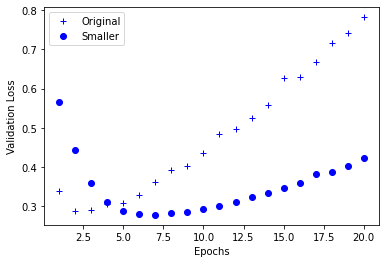

In [12]:
plt.plot(epochs, original_val_loss, 'b+', label='Original')
plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [13]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [14]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test),
                                     verbose=2)

Epoch 1/20
49/49 - 16s - loss: 0.4535 - acc: 0.7989 - val_loss: 0.3023 - val_acc: 0.8718
Epoch 2/20
49/49 - 16s - loss: 0.2123 - acc: 0.9152 - val_loss: 0.3710 - val_acc: 0.8588
Epoch 3/20
49/49 - 15s - loss: 0.1322 - acc: 0.9511 - val_loss: 0.3161 - val_acc: 0.8844
Epoch 4/20
49/49 - 15s - loss: 0.0502 - acc: 0.9833 - val_loss: 0.5631 - val_acc: 0.8631
Epoch 5/20
49/49 - 15s - loss: 0.0908 - acc: 0.9852 - val_loss: 0.5074 - val_acc: 0.8819
Epoch 6/20
49/49 - 15s - loss: 0.0020 - acc: 0.9998 - val_loss: 0.6872 - val_acc: 0.8780
Epoch 7/20
49/49 - 15s - loss: 2.0223e-04 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 0.8798
Epoch 8/20
49/49 - 15s - loss: 0.1658 - acc: 0.9909 - val_loss: 0.6973 - val_acc: 0.8793
Epoch 9/20
49/49 - 15s - loss: 1.0170e-04 - acc: 1.0000 - val_loss: 0.8374 - val_acc: 0.8784
Epoch 10/20
49/49 - 15s - loss: 1.7172e-05 - acc: 1.0000 - val_loss: 0.9404 - val_acc: 0.8795
Epoch 11/20
49/49 - 15s - loss: 3.7275e-06 - acc: 1.0000 - val_loss: 1.1000 - val_acc: 0.8798
Epo

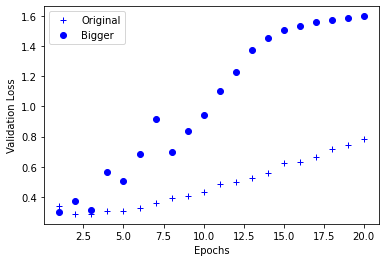

In [15]:
bigger_val_loss = bigger_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original')
plt.plot(epochs, bigger_val_loss, 'bo', label='Bigger')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [16]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [18]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 88ms/step - loss: 0.5074 - acc: 0.8012 - val_loss: 0.4151 - val_acc: 0.8532
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3113 - acc: 0.9062 - val_loss: 0.3330 - val_acc: 0.8886
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2687 - acc: 0.9211 - val_loss: 0.3396 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2473 - acc: 0.9288 - val_loss: 0.3385 - val_acc: 0.8848
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2359 - acc: 0.9342 - val_loss: 0.3576 - val_acc: 0.8778
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2272 - acc: 0.9368 - val_loss: 0.4157 - val_acc: 0.8593
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2167 - acc: 0.9425 - val_loss: 0.4778 - val_acc: 0.8412
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2143 - a

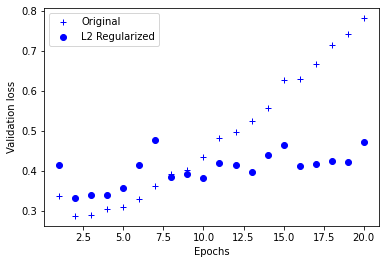

In [19]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2 Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

In [20]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [21]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test),
                               verbose=2)

Epoch 1/20
49/49 - 6s - loss: 0.5698 - acc: 0.6996 - val_loss: 0.4132 - val_acc: 0.8645
Epoch 2/20
49/49 - 2s - loss: 0.4190 - acc: 0.8336 - val_loss: 0.3134 - val_acc: 0.8856
Epoch 3/20
49/49 - 2s - loss: 0.3383 - acc: 0.8742 - val_loss: 0.2851 - val_acc: 0.8892
Epoch 4/20
49/49 - 2s - loss: 0.2930 - acc: 0.8964 - val_loss: 0.2779 - val_acc: 0.8895
Epoch 5/20
49/49 - 2s - loss: 0.2546 - acc: 0.9104 - val_loss: 0.2916 - val_acc: 0.8850
Epoch 6/20
49/49 - 2s - loss: 0.2274 - acc: 0.9204 - val_loss: 0.2952 - val_acc: 0.8876
Epoch 7/20
49/49 - 2s - loss: 0.2092 - acc: 0.9274 - val_loss: 0.3254 - val_acc: 0.8829
Epoch 8/20
49/49 - 2s - loss: 0.1966 - acc: 0.9335 - val_loss: 0.3216 - val_acc: 0.8851
Epoch 9/20
49/49 - 2s - loss: 0.1782 - acc: 0.9400 - val_loss: 0.3526 - val_acc: 0.8839
Epoch 10/20
49/49 - 2s - loss: 0.1700 - acc: 0.9404 - val_loss: 0.3671 - val_acc: 0.8823
Epoch 11/20
49/49 - 2s - loss: 0.1572 - acc: 0.9448 - val_loss: 0.3822 - val_acc: 0.8801
Epoch 12/20
49/49 - 2s - loss:

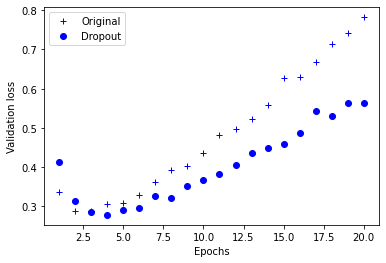

In [22]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout')
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()